# 기울기

### 기울기 소실 문제

In [3]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
weights = np.random.randn(10, 10) * 0.01
x = np.random.randn(10, 1)

for i in range(1, 11):
    x = sigmoid(np.dot(weights, x))
    print(f'{i}번째 층 출력 평균: {np.mean(x)}')

1번째 층 출력 평균: 0.4923981391662232
2번째 층 출력 평균: 0.5007433168636295
3번째 층 출력 평균: 0.5007308165030734
4번째 층 출력 평균: 0.5007305713032845
5번째 층 출력 평균: 0.5007305725302615
6번째 층 출력 평균: 0.5007305725406197
7번째 층 출력 평균: 0.5007305725405601
8번째 층 출력 평균: 0.5007305725405591
9번째 층 출력 평균: 0.5007305725405591
10번째 층 출력 평균: 0.5007305725405591


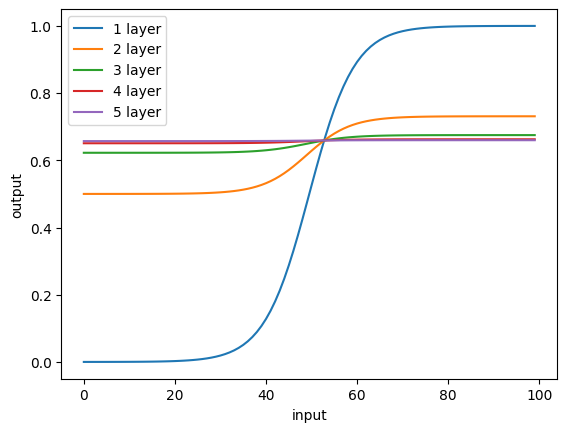

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100) #-10, 10까지 100개

for i in range(1, 6):
    x = sigmoid(x)
    plt.plot(x, label=f'{i} layer')

plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.show()

- 활성화 함수 변경

In [5]:
def relu(x):
    return np.maximum(0, x)

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_grad(x):
    return np.where(x > 0, 1, 0)

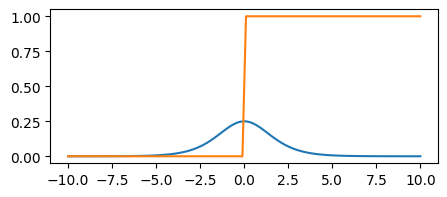

In [6]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(5, 2))
plt.plot(x, sigmoid_grad(x), label='Sigmoid Gradient')
plt.plot(x, relu_grad(x), label='Relu Gradient')


- 잔차 연결(Residual Connection) 효과

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        return self.layer2(torch.relu(self.layer1(x)))

In [9]:
class ResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer = nn.Linear(10, 10)

    def forward(self, x):
        return x + torch.relu(self.layer(x))

In [10]:
simple_model = SimpleNN()
residual_model = ResidualNN()

x = torch.randn(1, 10)

output_simple = simple_model(x)
output_residual = residual_model(x)

print(f'입력값-일반 신경망: {x - output_simple}')
print(f'입력값-잔차 연결 신경망: {x - output_residual}')

입력값-일반 신경망: tensor([[-0.3392, -0.0835,  0.0474,  1.6161,  1.5023,  0.3532, -0.2177,  0.4347,
         -0.4226, -1.0727]], grad_fn=<SubBackward0>)
입력값-잔차 연결 신경망: tensor([[ 0.0000,  0.0000,  0.0000,  0.0000, -0.1751,  0.0000,  0.0000,  0.0000,
         -0.5419,  0.0000]], grad_fn=<SubBackward0>)


In [11]:
# 기울기 변화

# 데이터 생성
x = torch.randn(100, 10)
y = torch.randn(100, 10)

# 모델 생성
sim_model = SimpleNN()
res_model = ResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)

In [14]:
epochs = 100
loss_sim_list = []
loss_res_list = []

for epoch in range(epochs):
    sim_optim.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)
    sim_loss.backward()
    sim_optim.step()
    loss_sim_list.append(sim_loss.item())

    res_optim.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output, y)
    res_loss.backward()
    res_optim.step()
    loss_res_list.append(res_loss.item())

print(f'일반 신경망 최종 손실값 : {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 최종 손실값: {loss_res_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기: {param.grad.norm()}')

for param in sim_model.parameters():
    print(f'잔차 신경망 기울기 크기: {param.grad.norm()}')

일반 신경망 최종 손실값 : 0.6570
잔차 연결 신경망 최종 손실값: 1.6034


In [16]:
class DeeperResidualNN(nn.Module):
     def __init__(self):
        super(DeeperResidualNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 10)

     def forward(self, x):
        residual = x
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x + residual


In [17]:
# 기울기 변화

# 데이터 생성
x = torch.randn(100, 10)
y = torch.randn(100, 10)

# 모델 생성
sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeeperResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optim = optim.Adam(deep_res_model.parameters(), lr=0.01)

In [18]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []
deep_res_loss_list = []

for epoch in range(epochs):
    sim_optim.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)
    sim_loss.backward()
    sim_optim.step()
    loss_sim_list.append(sim_loss.item())

    res_optim.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output, y)
    res_loss.backward()
    res_optim.step()
    loss_res_list.append(res_loss.item())

    deep_res_optim.zero_grad()
    deep_res_output = deep_res_model(x)
    deep_res_loss = criterion(deep_res_output, y)
    deep_res_loss.backward()
    deep_res_optim.step()
    deep_res_loss_list.append(deep_res_loss.item())


print(f'일반 신경망 최종 손실값: {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 최종 손실값: {loss_res_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기: {param.grad.norm()}')

for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기: {param.grad.norm()}')

일반 신경망 최종 손실값: 0.6450
잔차 연결 신경망 최종 손실값: 1.3251
일반 신경망 기울기 크기: 0.021100778132677078
일반 신경망 기울기 크기: 0.006454633083194494
일반 신경망 기울기 크기: 0.010647538118064404
일반 신경망 기울기 크기: 0.006038527935743332
잔차 연결 신경망 기울기 크기: 0.06196780130267143
잔차 연결 신경망 기울기 크기: 0.013563730753958225
